In [1]:
# !pip install swiftsimio==6.1.1 numpy==1.26.0 unyt==2.9.5

import woma    ## woma 1.2.0 - with entropy forcing
import swiftsimio as sw  ## swiftsimio 6.1.1
import numpy as np
import unyt ## unyt 2.9.5
import h5py
import matplotlib.pyplot as plt
R_earth = 6.371e6   # m
M_earth = 5.9724e24  # kg m^-3 
G = 6.67408e-11  # m^3 kg^-1 s^-2

In [3]:
def plot_spherical_profiles(planet):    
    fig, ax = plt.subplots(2, 2, figsize=(8,8))
    
    ax[0, 0].plot(planet.A1_r / R_earth, planet.A1_rho)
    ax[0, 0].set_xlabel(r"Radius, $r$ $[R_\oplus]$")
    ax[0, 0].set_ylabel(r"Density, $\rho$ [kg m$^{-3}$]")
    ax[0, 0].set_yscale("log")
    ax[0, 0].set_xlim(0, None)
    
    ax[1, 0].plot(planet.A1_r / R_earth, planet.A1_m_enc / M_earth)
    ax[1, 0].set_xlabel(r"Radius, $r$ $[R_\oplus]$")
    ax[1, 0].set_ylabel(r"Enclosed Mass, $M_{<r}$ $[M_\oplus]$")
    ax[1, 0].set_xlim(0, None)
    ax[1, 0].set_ylim(0, None)
    
    ax[0, 1].plot(planet.A1_r / R_earth, planet.A1_P)
    ax[0, 1].set_xlabel(r"Radius, $r$ $[R_\oplus]$")
    ax[0, 1].set_ylabel(r"Pressure, $P$ [Pa]")
    ax[0, 1].set_yscale("log")
    ax[0, 1].set_xlim(0, None)
    
    ax[1, 1].plot(planet.A1_r / R_earth, planet.A1_T)
    ax[1, 1].set_xlabel(r"Radius, $r$ $[R_\oplus]$")
    ax[1, 1].set_ylabel(r"Temperature, $T$ [K]")
    ax[1, 1].set_xlim(0, None)
    ax[1, 1].set_ylim(0, None)
    
    plt.tight_layout()
    plt.show()



In [3]:
import matplotlib.pyplot as plt
import matplotlib

In [4]:
import sys 
import os

sys.path.append(os.path.abspath("WoMa-main/woma"))
from woma.eos import eos

Saving "impactor1.hdf5"... 
num_particle = 12932
boxsize      = 1e+02
mat_id       = 400 401 

Unit mass    = 5.97240e+27 g
Unit length  = 6.37100e+08 cm
Unit time    = 1.00000e+00 s

Min, max values (file units):
  pos = [49.476, 50.524,    49.476, 50.524,    49.475, 50.525]
  vel = [0, 0,    0, 0,    0, 0]
  m = 9.4863e-06, 9.535e-06
  rho = 0.13916, 0.43061
  P = 1.7961e-09, 6.8776e-08
  u = 1.5999e-08, 3.6057e-08
  h = 0.031612, 0.046102
  s = 3.6842e-13, 3.0112e-12

Saved "impactor1.hdf5"


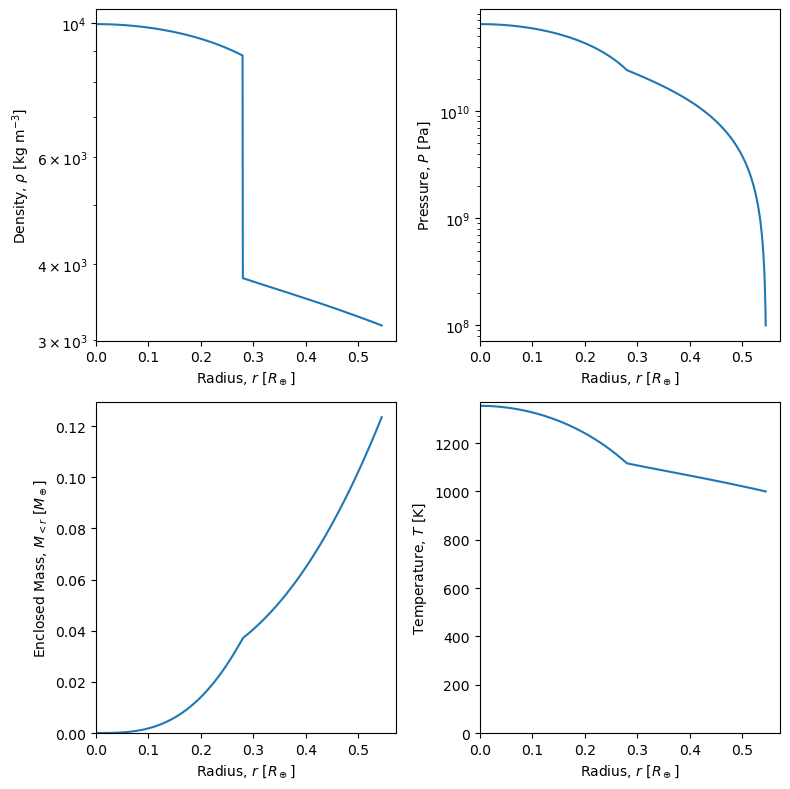

In [5]:
## Specify the number of impacts to dictate the size of the impactor

mass_tar = 1/8.091
num_impacts = 1
planet = woma.Planet(
    name            = "impactor_planet",
    A1_mat_layer    = ["ANEOS_iron", "ANEOS_forsterite"], 
    A1_T_rho_type   = ["adiabatic", "adiabatic"],  
    P_s             = 1e8,                                # Surface pressure
    T_s             = 1000,                               # Surface temperature
    A1_M_layer      = [0.3*mass_tar*M_earth/num_impacts, 0.7*mass_tar*M_earth/num_impacts],      # Masses of each layer
)
planet.gen_prof_L2_find_R_R1_given_M1_M2(R_min=0.45*R_earth, R_max=0.55*R_earth, verbosity=0)

planet_particles = woma.ParticlePlanet(planet, 1e4, verbosity=0)



# Save to the hdf5 file
filename=f'impactor{num_impacts}.hdf5'
planet_particles.save(
    filename=filename,
    boxsize=100*R_earth,                                         # set the boxsize
    file_to_SI=woma.Conversions(M_earth, R_earth, 1),           
    #file_to_SI=utils.SI_to_cgs                                 
    do_entropies=True)   


plot_spherical_profiles(planet)


In [6]:
mass_tar = 1

planet = woma.Planet(
    A1_mat_layer    = ["ANEOS_iron", "ANEOS_forsterite", "HM80_HHe"],
    A1_T_rho_type   = ["entropy=1500", "adiabatic", "adiabatic"],
    P_s             = 1e8,
    T_s             = 1000,
    M               = M_earth * mass_tar,
    A1_R_layer      = [None, 0.8 * R_earth * (mass_tar)**(1/3.7), 1.5 * R_earth * (mass_tar)**(1/3.7)],  # Using mass radius relation for earth 
)

# Generate the profiles
planet.gen_prof_L3_find_R1_given_M_R_R2()
planet_particles = woma.ParticlePlanet(planet, 1e5, verbosity=0)
 # Save to the hdf5 file
filename=f'three_layer.hdf5'
planet_particles.save(
    filename=filename,
    boxsize=100*R_earth,                                        
    file_to_SI=woma.Conversions(M_earth, R_earth, 1),           
    #file_to_SI=utils.SI_to_cgs                                 
    do_entropies=True) 



Iter 11(40): R1=0.75977R_E: tol=0.00051(0.001)  
Tweaking M to avoid density peaks at the center of the planet... Done
Planet "None": 
    M            = 5.9968e+24  kg  = 1.0041  M_earth
    R            = 9.5565e+06  m  = 1.5  R_earth
    mat          = ["ANEOS_iron", "ANEOS_forsterite", "HM80_HHe"] 
    mat_id       = [401, 400, 200] 
    T_rho_type   = ["entropy=1500", "adiabatic", "adiabatic"] 
    R_layer      = [0.75976, 0.7988, 1.5]  R_earth
    M_layer      = [0.92169, 0.043019, 0.039384]  M_earth
    M_frac_layer = [0.91793, 0.042844, 0.039223]  M_tot
    idx_layer    = [506, 532, 999] 
    P_s          = 1e+08  Pa
    T_s          = 1000  K
    rho_s        = 24.852  kg m^-3
    P_2          = 4.1926e+09  Pa
    T_2          = 2603.8  K
    rho_2        = 2970.5  kg m^-3
    P_1          = 1.6895e+10  Pa
    T_1          = 1724.4  K
    rho_1        = 8308.3  kg m^-3
    P_0          = 5.6508e+11  Pa
    T_0          = 3980.2  K
    rho_0        = 15109  kg m^-3
    I_MR2   

In [7]:
## Credit JINGYAO DOU

Di_id_colour = {Di_mat_id[mat]: colour for mat, colour in Di_mat_colour.items()}

Di_id_size = {Di_mat_id[mat]: size * 3.5 for mat, size in Di_mat_size.items()}

def sw_particles_plot(loc, ax_lim=2.0, Entropy=True, center=True, colourplot=False, plotout=False):

    """plot the particles radial profile"""

    data = sw.load(loc)
    box_mid = 0.5 * data.metadata.boxsize[0]
    pos = data.gas.coordinates - box_mid
    pos = np.array(pos)
    data.gas.densities.convert_to_cgs()
    rho_cgs = np.array(data.gas.densities)
    data.gas.densities.convert_to_mks()
    rho_mks = np.array(data.gas.densities)
    data.gas.pressures.convert_to_cgs()
    p = np.array(data.gas.pressures)
    data.gas.internal_energies.convert_to_mks()
    u = np.array(data.gas.internal_energies)
    matid = data.gas.material_ids
    data.gas.pressures.convert_to_mks()
    p_mks = np.array(data.gas.pressures)
    matid = np.array(matid)

    colour = np.empty(len(matid), dtype=object)
    for id_c, c in Di_id_colour.items():
        colour[matid == id_c] = c

    entropy = np.zeros_like(p)
    T = np.zeros_like(p)

    if center:
        # data.gas.masses.convert_to_mks()
        m = np.array(data.gas.masses)
        pos_centerM = np.sum(pos * m[:, np.newaxis], axis=0) / np.sum(m)
        # vel_centerM = np.sum(vel * m[:,np.newaxis], axis=0) / np.sum(m)

        pos -= pos_centerM
        # vel -= vel_centerM

    if Entropy:
        sel = (matid != 200) & (matid != 0)
        entropy[sel] = woma.eos.eos.A1_s_u_rho(u[sel], rho_mks[sel], matid[sel])

    T = woma.eos.eos.A1_T_u_rho(u, rho_mks, matid)

    XY = np.hypot(pos[:, 0], pos[:, 1])
    R = np.hypot(XY, pos[:, 2])

    print("Read %d particles!" % (len(R)))

    fig, axs = plt.subplots(3, 2, figsize=(12, 15))
    axs = axs.ravel()

    axs[0] = sw_plot(loc, ax=axs[0])

    if colourplot:
        axs[1].scatter(R, T, s=1, c=colour)
    else:
        axs[1].scatter(R, T, s=1)
    axs[1].tick_params(axis="x", direction="in")
    axs[1].tick_params(axis="y", direction="in")
    axs[1].set_title("Temperature profile", fontsize=22)
    axs[1].set_xlabel(r"$R\oplus$")
    axs[1].set_ylabel(r"T K")
    axs[1].set_yscale("log")

    if colourplot:
        axs[2].scatter(R, rho_cgs, s=1, c=colour)
    else:
        axs[2].scatter(R, rho_cgs, s=1)
    axs[2].set_title(r"Density $\rho$ profiles", fontsize=22)
    axs[2].set_xlabel(r"$R\oplus$")
    axs[2].set_ylabel(r"$\rho$ $g/cm^{3}$")
    axs[2].set_yscale("log")
    axs[2].tick_params(axis="x", direction="in")
    axs[2].tick_params(axis="y", direction="in")
    if colourplot:
        axs[3].scatter(R, p_mks / 1e9, s=1, c=colour)
    else:
        axs[3].scatter(R, p_mks / 1e9, s=1)
    axs[3].set_title("Pressure profile", fontsize=22)
    axs[3].set_xlabel(r"$R\oplus$")
    axs[3].set_ylabel("Gpa")
    axs[3].set_yscale("log")
    axs[3].tick_params(axis="x", direction="in")
    axs[3].tick_params(axis="y", direction="in")

    if colourplot:
        axs[4].scatter(R, entropy, s=1, c=colour)
    else:
        axs[4].scatter(R, entropy, s=1)
    axs[4].set_title("Entropy profile", fontsize=22)
    axs[4].set_xlabel(r"$R\oplus$")
    axs[4].set_ylabel("J/kg/K")
    axs[4].tick_params(axis="x", direction="in")
    axs[4].tick_params(axis="y", direction="in")

    if colourplot:
        axs[5].scatter(R, u, s=1, c=colour)
    else:
        axs[5].scatter(R, u, s=1)
    axs[5].set_title("Internal energy profile", fontsize=22)
    axs[5].set_xlabel(r"$R\oplus$")
    axs[5].set_ylabel("J/kg")
    axs[5].set_yscale("log")
    axs[5].tick_params(axis="x", direction="in")
    axs[5].tick_params(axis="y", direction="in")

    fig.tight_layout()
    
    if plotout is True:
        return fig
    else:
        plt.show()
        plt.cla()
        plt.clf()
        plt.close()

sw_particles_plot("target.hdf5", colourplot="True")

NameError: name 'Di_mat_colour' is not defined

In [ ]:
## CREDIT - Jingyao Dou

outtime = 500
txtsize = 15
font_size = 20
idoff = 200000000
bodyoff = 100000000

import matplotlib

params = {
    "axes.labelsize": font_size,
    "font.size": font_size,
    "xtick.labelsize": font_size,
    "ytick.labelsize": font_size,
    "font.family": "serif",
}
matplotlib.rcParams.update(params)

# Material IDs ( = type_id * type_factor + unit_id )
type_factor = 100
type_ANEOS = 4
type_Til = 1
type_HHe = 2
type_SESAME = 3
type_idg = 0
id_body = 200000000
# Name and ID
Di_mat_id = {
    "ANEOS_iron": type_ANEOS * type_factor + 1,
    "ANEOS_iron_2": type_ANEOS * type_factor + 1 + id_body,
    "ANEOS_alloy": type_ANEOS * type_factor + 2,
    "ANEOS_alloy_2": type_ANEOS * type_factor + 2 + id_body,
    "ANEOS_forsterite": type_ANEOS * type_factor,
    "ANEOS_forsterite_2": type_ANEOS * type_factor + id_body,
    "HM80_HHE": type_HHe * type_factor,
    "HM80_rock": type_HHe * type_factor + 2,
    "HM80_ice": type_HHe * type_factor + 1,
    "SS08_water": type_SESAME * type_factor + 3,
    "SS08_water_2": type_SESAME * type_factor + 3 +id_body,
    "AQUA": type_SESAME * type_factor + 4,
    "CMS19_HHe": type_SESAME * type_factor + 7,
    "idg_HHe": type_idg * type_factor,
    "Til_iron": type_Til * type_factor,
    "Til_iron_2": type_Til * type_factor + id_body,
    "Til_granite": type_Til * type_factor + 1,
    "Til_granite_2": type_Til * type_factor + 1 + id_body,
}
# Colour
Di_mat_colour = {
    "ANEOS_iron": "tomato",  # "tomato",
    "ANEOS_alloy": "tomato",
    "ANEOS_forsterite": "mediumseagreen",  # "mediumseagreen",
    "ANEOS_iron_2": "sandybrown",
    "ANEOS_alloy_2": "sandybrown",
    "ANEOS_forsterite_2": "pink",
    "SS08_water": "skyblue",
    "AQUA": "skyblue",
    "HM80_HHE": "aliceblue",
    "HM80_rock": "green",
    "HM80_ice": "lightblue",
    "CMS19_HHe": "lavenderblush",
    "idg_HHe": "lavenderblush",
    "Til_iron": "tomato",
    "Til_iron_2": "sandybrown",
    "Til_granite": "mediumseagreen",
    "Til_granite_2": "pink",
}
# marker size
Di_mat_size = {
    "ANEOS_iron": 1,
    "ANEOS_alloy": 1,
    "ANEOS_forsterite": 1,
    "ANEOS_alloy_2": 1,
    "ANEOS_iron_2": 1,
    "ANEOS_forsterite_2": 1,
    "HM80_HHE": 1,
    "HM80_rock": 1,
    "HM80_ice": 1,
    "SS08_water": 1,
    "AQUA": 1,
    "CMS19_HHe": 1,
    "idg_HHe": 5,
    "Til_iron": 1,
    "Til_iron_2": 1,
    "Til_granite": 1,
    "Til_granite_2": 1,
}

Di_id_colour = {Di_mat_id[mat]: colour for mat, colour in Di_mat_colour.items()}

Di_id_size = {Di_mat_id[mat]: size * 3.5 for mat, size in Di_mat_size.items()}

# density limits
rhomin = 5e-5
rhomax = 15.0

# entropy limits
cmin = 1.5
cmax = 12.0

# number of cells for grid
Ng = 601j
Ngz = 21j

# region to grid/plot
xmax = 3
xmin = -xmax
ymin = -xmax
ymax = xmax
zmin = -3
zmax = 3

zcut = 6.0


def sw_plot(loc, snapshot_id=None, ax=None, npt=1e9, ax_lim=3.0, belowZ=True, figsz=10):
    """Select and load the particles to plot.

    loc: snapshot path
    snapshot_id: if loc is not the full path of a snapshot but a subparent path, then you need to provide the snapshot number you want to plot.
    ax: the returned axis
    npt: number of particles in the target
    ax_lim: axis limit [-ax_lim,ax_lim]
    belowZ: if only plot semisphere particles below the z=0 plane.
    figsz: figure size
    """
    # Load
    if snapshot_id is not None:
        snapshot = "snapshot_%04d.hdf5" % snapshot_id
        data = sw.load(loc + snapshot)
    else:
        data = sw.load(loc)

    box_mid = 0.5 * data.metadata.boxsize[0] / R_earth
    pos = data.gas.coordinates - box_mid
    id = data.gas.particle_ids
    mat_id = data.gas.material_ids.value
    m = data.gas.masses

    # move to origin to the CoM
    pos_centerM = np.sum(pos * m[:, np.newaxis], axis=0) / np.sum(m)
    pos -= pos_centerM

    # Restrict to z < 0
    if belowZ:
        sel = np.where(np.logical_and(pos[:, 2] < 0.1, pos[:, 2] > -600))[0]
        mat_id = mat_id[sel]
        id = id[sel]
        m = m[sel]
        pos = pos[sel]

    # Sort in z order so higher particles are plotted on top
    sort = np.argsort(pos[:, 2])
    mat_id = mat_id[sort]
    id = id[sort]
    m = m[sort]
    pos = pos[sort]

    mat_id[npt <= id] += id_body

    # Plot the particles, coloured by their material.
    fig = plt.figure(figsize=(figsz, figsz))
    if ax is not None:
        ax = ax
    else:
        ax = plt.gca()

    ax.set_aspect("equal", anchor="C")

    colour = np.empty(len(pos), dtype=object)
    for id_c, c in Di_id_colour.items():
        colour[mat_id == id_c] = c

    size = np.empty(len(pos), dtype=float)
    for id_s, s in Di_id_size.items():
        size[mat_id == id_s] = s

    ax.scatter(
        pos[:, 0],
        pos[:, 1],
        s=3.5 * size,
        c=colour,
        edgecolors="none",
        marker=".",
        alpha=1,
    )

    ax.set_ylabel(r"y Position ($R_\oplus$)", fontsize=22)
    ax.set_xlabel(r"x Position ($R_\oplus$)", fontsize=22)

    ax.yaxis.label.set_color("k")
    ax.xaxis.label.set_color("k")
    ax.tick_params(axis="x", colors="k", labelsize=14)
    ax.tick_params(axis="y", colors="k", labelsize=14)

    ax.set_xlim([-ax_lim, ax_lim])
    ax.set_ylim([-ax_lim, ax_lim])

    return ax


In [9]:
## CREDIT - Jingyao Dou

def sw_particles_plot(loc, ax_lim=2.0, Entropy=True, center=True, colourplot=False, plotout=False):

    """plot the particles radial profile"""

    data = sw.load(loc)
    box_mid = 0.5 * data.metadata.boxsize[0]
    pos = data.gas.coordinates - box_mid
    pos = np.array(pos)
    data.gas.densities.convert_to_cgs()
    rho_cgs = np.array(data.gas.densities)
    data.gas.densities.convert_to_mks()
    rho_mks = np.array(data.gas.densities)
    data.gas.pressures.convert_to_cgs()
    p = np.array(data.gas.pressures)
    data.gas.internal_energies.convert_to_mks()
    u = np.array(data.gas.internal_energies)
    matid = data.gas.material_ids
    data.gas.pressures.convert_to_mks()
    p_mks = np.array(data.gas.pressures)
    matid = np.array(matid)

    colour = np.empty(len(matid), dtype=object)
    for id_c, c in Di_id_colour.items():
        colour[matid == id_c] = c

    entropy = np.zeros_like(p)
    T = np.zeros_like(p)

    if center:
        # data.gas.masses.convert_to_mks()
        m = np.array(data.gas.masses)
        pos_centerM = np.sum(pos * m[:, np.newaxis], axis=0) / np.sum(m)
        # vel_centerM = np.sum(vel * m[:,np.newaxis], axis=0) / np.sum(m)

        pos -= pos_centerM
        # vel -= vel_centerM

    if Entropy:
        sel = (matid != 200) & (matid != 0)
        entropy[sel] = woma.eos.eos.A1_s_u_rho(u[sel], rho_mks[sel], matid[sel])

    T = woma.eos.eos.A1_T_u_rho(u, rho_mks, matid)

    XY = np.hypot(pos[:, 0], pos[:, 1])
    R = np.hypot(XY, pos[:, 2])

    print("Read %d particles!" % (len(R)))

    fig, axs = plt.subplots(3, 2, figsize=(12, 15))
    axs = axs.ravel()

    axs[0] = sw_plot(loc, ax=axs[0])

    if colourplot:
        axs[1].scatter(R, T, s=1, c=colour)
    else:
        axs[1].scatter(R, T, s=1)
    axs[1].tick_params(axis="x", direction="in")
    axs[1].tick_params(axis="y", direction="in")
    axs[1].set_title("Temperature profile", fontsize=22)
    axs[1].set_xlabel(r"$R\oplus$")
    axs[1].set_ylabel(r"T K")
    axs[1].set_yscale("log")

    if colourplot:
        axs[2].scatter(R, rho_cgs, s=1, c=colour)
    else:
        axs[2].scatter(R, rho_cgs, s=1)
    axs[2].set_title(r"Density $\rho$ profiles", fontsize=22)
    axs[2].set_xlabel(r"$R\oplus$")
    axs[2].set_ylabel(r"$\rho$ $g/cm^{3}$")
    axs[2].set_yscale("log")
    axs[2].tick_params(axis="x", direction="in")
    axs[2].tick_params(axis="y", direction="in")
    if colourplot:
        axs[3].scatter(R, p_mks / 1e9, s=1, c=colour)
    else:
        axs[3].scatter(R, p_mks / 1e9, s=1)
    axs[3].set_title("Pressure profile", fontsize=22)
    axs[3].set_xlabel(r"$R\oplus$")
    axs[3].set_ylabel("Gpa")
    axs[3].set_yscale("log")
    axs[3].tick_params(axis="x", direction="in")
    axs[3].tick_params(axis="y", direction="in")

    if colourplot:
        axs[4].scatter(R, entropy, s=1, c=colour)
    else:
        axs[4].scatter(R, entropy, s=1)
    axs[4].set_title("Entropy profile", fontsize=22)
    axs[4].set_xlabel(r"$R\oplus$")
    axs[4].set_ylabel("J/kg/K")
    axs[4].tick_params(axis="x", direction="in")
    axs[4].tick_params(axis="y", direction="in")

    if colourplot:
        axs[5].scatter(R, u, s=1, c=colour)
    else:
        axs[5].scatter(R, u, s=1)
    axs[5].set_title("Internal energy profile", fontsize=22)
    axs[5].set_xlabel(r"$R\oplus$")
    axs[5].set_ylabel("J/kg")
    axs[5].set_yscale("log")
    axs[5].tick_params(axis="x", direction="in")
    axs[5].tick_params(axis="y", direction="in")

    fig.tight_layout()
    
    if plotout is True:
        return fig
    else:
        plt.show()
        plt.cla()
        plt.clf()
        plt.close()
    plt.savefig('imp_profiles.png')

sw_particles_plot('impactor1.hdf5')



IndexError: invalid index to scalar variable.

In [10]:
## CREDIT - JINGYAO DOU

def load_to_woma(snapshot):
    # Load
    data    = sw.load(snapshot)
    
    data.gas.coordinates.convert_to_mks()
    data.gas.velocities.convert_to_mks()
    data.gas.smoothing_lengths.convert_to_mks()
    data.gas.masses.convert_to_mks()
    data.gas.densities.convert_to_mks()
    data.gas.pressures.convert_to_mks()
    data.gas.internal_energies.convert_to_mks()
    box_mid = 0.5*data.metadata.boxsize[0].to(unyt.m)

    pos     = np.array(data.gas.coordinates - box_mid)
    vel     = np.array(data.gas.velocities)
    h       = np.array(data.gas.smoothing_lengths)
    m       = np.array(data.gas.masses)
    rho     = np.array(data.gas.densities)
    p       = np.array(data.gas.pressures)
    u       = np.array(data.gas.internal_energies)
    matid   = np.array(data.gas.material_ids)
    
    pos_centerM = np.sum(pos * m[:,np.newaxis], axis=0) / np.sum(m)
    vel_centerM = np.sum(vel * m[:,np.newaxis], axis=0) / np.sum(m)
    
    pos -= pos_centerM
    vel -= vel_centerM
    
    xy = np.hypot(pos[:,0],pos[:,1])
    r  = np.hypot(xy,pos[:,2])
    r  = np.sort(r)
    R  = np.mean(r[-100:])
    
    return pos, vel, h, m, rho, p, u, matid, R


from sklearn.cluster import DBSCAN
import numpy as np

# edited version of load to woma that finds the largest body in the system and its corresponding com

def load_to_woma_com(snapshot):
    # Load data
    data = sw.load(snapshot)
    
    data.gas.coordinates.convert_to_mks()
    data.gas.velocities.convert_to_mks()
    data.gas.smoothing_lengths.convert_to_mks()
    data.gas.masses.convert_to_mks()
    data.gas.densities.convert_to_mks()
    data.gas.pressures.convert_to_mks()
    data.gas.internal_energies.convert_to_mks()
    
    box_mid = 0.5 * data.metadata.boxsize[0].to(unyt.m)
    
    # Convert positions and velocities
    pos = np.array(data.gas.coordinates - box_mid)
    vel = np.array(data.gas.velocities)
    h = np.array(data.gas.smoothing_lengths)
    m = np.array(data.gas.masses)
    rho = np.array(data.gas.densities)
    p = np.array(data.gas.pressures)
    u = np.array(data.gas.internal_energies)
    matid = np.array(data.gas.material_ids)
    
    # DBSCAN clustering to find groups of particles (using distance threshold and minimum particles per cluster)
    db = DBSCAN(eps=1000, min_samples=10) 
    labels = db.fit_predict(pos)
    
    # Find the largest cluster by mass
    unique_labels = set(labels)
    largest_cluster_label = max(unique_labels, key=lambda label: np.sum(m[labels == label]) if label != -1 else 0)
    
    # Get particles in the largest cluster
    largest_cluster_indices = np.where(labels == largest_cluster_label)[0]
    
    # Filter out particles from the largest cluster
    pos = pos[largest_cluster_indices]
    vel = vel[largest_cluster_indices]
    h = h[largest_cluster_indices]
    m = m[largest_cluster_indices]
    rho = rho[largest_cluster_indices]
    p = p[largest_cluster_indices]
    u = u[largest_cluster_indices]
    matid = matid[largest_cluster_indices]
    
    com = np.sum(pos * m[:, np.newaxis], axis=0) / np.sum(m)

    
    # Calculate the radius of the largest body (mean distance of particles from the COM)
    distances = np.linalg.norm(pos - com, axis=1)
    R = np.mean(distances)  
    
    M = np.sum(m)
    
    return pos, vel, h, m, rho, p, u, matid, R, com, M


In [11]:
gamma = 0.1
b = 0.7

loc_tar = 'coll1_0010.hdf5'
loc_imp = 'impactor_0000.hdf5'

# Reset the variables
pos_tar = 0
vel_tar = 0
h_tar = 0
m_tar = 0
rho_tar = 0
p_tar = 0
u_tar = 0
matid_tar = 0
R_tar = 0

pos_imp = 0
vel_imp = 0
h_imp = 0
m_imp = 0
rho_imp = 0
p_imp = 0
u_imp = 0
matid_imp = 0
R_imp = 0

pos_tar_com = 0
vel_tar_com = 0
h_tar_com = 0 
m_tar_com = 0
rho_tar_com = 0 
p_tar_com = 0
u_tar_com = 0 
matid_tar_com = 0 
R_tar_com = 0 
com = 0 
mass = 0

pos_tar, vel_tar, h_tar, m_tar, rho_tar, p_tar, u_tar, matid_tar, R_tar = load_to_woma(loc_tar)
pos_imp, vel_imp, h_imp, m_imp, rho_imp, p_imp, u_imp, matid_imp, R_imp = load_to_woma(loc_imp)
pos_tar_com, vel_tar_com, h_tar_com, m_tar_com, rho_tar_com, p_tar_com, u_tar_com, matid_tar_com, R_tar_com, com, mass = load_to_woma_com(loc_tar) # Load in variables for only the largest body in the target file

M_t = np.sum(m_tar_com)
M_i = np.sum(m_imp)
R_t = R_tar_com
R_i = R_imp

# Mutual escape speed
v_esc = np.sqrt(2 * G * (M_t + M_i) / (R_t + R_i))

# Initial position and velocity of the target
A1_pos_t = np.array([0., 0., 0.])
A1_vel_t = np.array([0., 0., 0.])

A1_pos_i, A1_vel_i = woma.impact_pos_vel_b_v_c_t(
    b       = b,
    v_c     = 1.1*v_esc, 
    t       = 3600, 
    R_t     = R_t, 
    R_i     = R_i, 
    M_t     = M_t, 
    M_i     = M_i,
)

A1_pos_com = (M_t * A1_pos_t + M_i * A1_pos_i) / (M_t + M_i)
A1_pos_t -= A1_pos_com
A1_pos_i -= A1_pos_com

# Centre of momentum
A1_vel_com = (M_t * A1_vel_t + M_i * A1_vel_i) / (M_t + M_i)
A1_vel_t -= A1_vel_com
A1_vel_i -= A1_vel_com

pos_tar += A1_pos_t
vel_tar[:] += A1_vel_t

pos_imp += A1_pos_i
vel_imp[:] += A1_vel_i



with h5py.File(f"coll2.hdf5", "w") as f:
    woma.save_particle_data(
        f,
        np.append(pos_tar, pos_imp, axis=0),
        np.append(vel_tar, vel_imp, axis=0),
        np.append(m_tar, m_imp),
        np.append(h_tar, h_imp),
        np.append(rho_tar, rho_imp),
        np.append(p_tar, p_imp),
        np.append(u_tar, u_imp),
        np.append(matid_tar, matid_imp),
        boxsize=500 * R_earth, 
        file_to_SI=woma.Conversions(M_earth, R_earth, 1),
        
    )

        
    
# Plot to check correct configuration between bodies
plt.figure(figsize=(10, 8))
plt.scatter(pos_tar[:, 0], pos_tar[:, 1], s=1, color='blue', label='Target')
plt.scatter(pos_imp[:, 0], pos_imp[:, 1], s=1, color='red', label='Impactor')
    

plt.xlabel('X Position [m]')
plt.ylabel('Y Position [m]')
plt.title('Target and Impactor Particle Positions (2D)')
plt.legend()
plt.axis('equal')
plt.grid(True)
plt.show()



FileNotFoundError: [Errno 2] Unable to open file (unable to open file: name = 'coll1_0010.hdf5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [32]:
import h5py
import matplotlib.pyplot as plt


try:
    with h5py.File("impactor.hdf5", "r") as file:
        print(list(file.keys()))
except OSError as e:

    print("Error accessing file:", e)


file_path = "/user/home/qb20321/hammer/denseplanets/0d06Earth/impact/highS/gamma0d4/low_vel/pX/b0d11/v10d1269kms/PLANETimpact_0d0h_0d05978898_npt203296_0d08370267_v10d12687617kms2d74_b0d110_pX_EiEf.hdf5"


with h5py.File('atmo1.hdf5', 'r') as f:
    if "PartType0/Coordinates" in f:
        coordinates = f["PartType0/Coordinates"][:]  
    else:
        print("Dataset 'PartType0/Coordinates' not found in the file.")

fig = plt.figure(figsize=(15,3))
plt.scatter(coordinates[:,0],coordinates[:,1],s=0.05)

['Header', 'PartType0', 'RuntimePars', 'Units']


FileNotFoundError: [Errno 2] Unable to open file (unable to open file: name = 'atmo1.hdf5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)